In [0]:
%run /Users/pnl0rc8b@emea.royalahold.net/FINALIZED_Notebooks/Functions_Finalized

In [0]:
%run /Users/pnl0rc8b@emea.royalahold.net/FINALIZED_Notebooks/Functions_Tables

#Configure Parameters

In [0]:
# PARAMETERS
ATTRIBUUT = "ndAddedSalt" # Selecteer Attribuut
Classes_threshold = 10
Overig_treshold = 500
Classes_threshold = 11
Overig_threshold = 300 # Class beneden deze threshold, zal worden toegevoegd aan class: 'overig'

Multi_label = False
numerieke_features = load_numerical_features(ATTRIBUUT)

Numerieke Features: []

# Load model from database

In [0]:
#dbutils.fs.cp("dbfs:/FileStore/nd_MODELS_publicatie/model_"+str(ATTRIBUUT)+".h5", "file:/FileStore/nd_MODELS_publicatie/model_"+str(ATTRIBUUT)+"_1__LOADED.h5")
from tensorflow import keras
model = keras.models.load_model("/dbfs/FileStore/nd_MODELS/model_"+str(ATTRIBUUT)+".h5")

# Formateer Attribuut

Amount of rows: (35905, 'Amount of columns: ', 54)
ATTRIBUUT: ndAddedSalt
{'EMPTY': 14408, 'False': 11000, 'True': 10497}

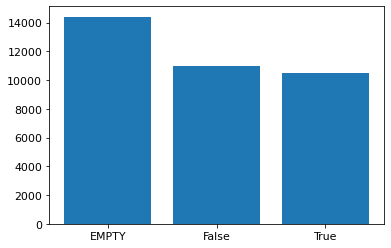

null entries = 0
Shape van dataframe: (23374, 27)
null entries = 14
Vocabular size: 39801.0
Numerical Features: Index([], dtype='object')
Shape Numerical Features: (23360, 0)
Shape Text Features: (23360, 301)
Shape Targets: (23360, 3)
 1/730 [..............................] - ETA: 1:00 33/730 [>.............................] - ETA: 1s  65/730 [=>............................] - ETA: 1s 96/730 [==>...........................] - ETA: 1s127/730 [====>.........................] - ETA: 0s158/730 [=====>........................] - ETA: 0s191/730 [======>.......................] - ETA: 0s223/730 [========>.....................] - ETA: 0s255/730 [=========>....................] - ETA: 0s288/730 [==========>...................] - ETA: 0s321/730 [============>.................] - ETA: 0s354/730 [=============>................] - ETA: 0s387/730 [==============>...............] - ETA: 0s420/730 [================>.............] - ETA: 0s452/730 [=================>............] - ETA: 0s484/730 [==================>...........] - ETA: 0s516/730 [====================>.........] - ETA: 0s548/730 [=====================>........] - ETA: 0s578/730 [======================>.......] - ETA: 0s612/730 [========================>.....] - ETA: 0s645/730 [=========================>....] - ETA: 0s677/730 [==========================>...] - ETA: 0s709/730 [============================>.] - ETA: 0s730/730 [==============================] - 1s 2ms/step
 1/730 [..............................] - ETA: 1:57 - loss: 0.3136 - accuracy: 0.9688 31/730 [>.............................] - ETA: 1s - loss: 0.0839 - accuracy: 0.9798  59/730 [=>............................] - ETA: 1s - loss: 0.0950 - accuracy: 0.9788 87/730 [==>...........................] - ETA: 1s - loss: 0.0850 - accuracy: 0.9792116/730 [===>..........................] - ETA: 1s - loss: 0.0787 - accuracy: 0.9801145/730 [====>.........................] - ETA: 1s - loss: 0.0831 - accuracy: 0.9800176/730 [======>.......................] - ETA: 0s - loss: 0.0896 - accuracy: 0.9787206/730 [=======>......................] - ETA: 0s - loss: 0.0880 - accuracy: 0.9788236/730 [========>.......

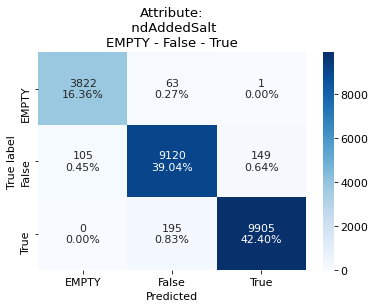

Confusion Matrix:
**************************
 [[3822 63 1]
 [ 105 9120 149]
 [ 0 195 9905]] 
**************************

Accuracy: 97.8039383561644
Classification report: precision recall f1-score support

 0 0.97 0.98 0.98 3886
 1 0.97 0.97 0.97 9374
 2 0.99 0.98 0.98 10100

 accuracy 0.98 23360
 macro avg 0.98 0.98 0.98 23360
weighted avg 0.98 0.98 0.98 23360

0

In [0]:
nd_controle = koppel_ndAttributen_new_products(NASA_CONTROLE)
df_geformateerd, multi_label_flag, classes_available = create_overige_class(nd_controle, ATTRIBUUT,Classes_threshold, Overig_threshold)

DF_merged = koppel_preprocessed_text(df_geformateerd, DF_NLP_spark) # Hier moeten we het nieuwe assortiment door de tokenizer laten loopen
DF_merged = fix_empty_fields(DF_merged, ATTRIBUUT)
DF_merged = Correlation_matrix(DF_merged, ATTRIBUUT, show_nan_plot=False, show_correlation_matrix=False)

# Neural network
numerical, text, target, vocab_size = single_prep_controle(numerieke_features, DF_merged, ATTRIBUUT) # Preparation, before training

#Predictions
list_ytest, list_yhat, yhat2 = predictions_2inputs(model, numerical, text, target)
plot_confusion_matrix(DF_merged, confusion_matrix(list_ytest, list_yhat), ATTRIBUUT)
accuracy_report(list_ytest, list_yhat, macro_f1_list=[])
#Predictions to dataframe
controle_tabel = predictions_to_dataframe(DF_merged, ATTRIBUUT, list_ytest, list_yhat)

# Controle Tabellen

In [0]:
equal, unequal = unequal_and_equal_table(controle_tabel, ATTRIBUUT) # Both spark dataframes

In [0]:
display(unequal)

gtin,gln,NASA_NR,MERKNAAM,SCHAPSTICKER_OMSCHRIJVING,ASSGROEP_OMSCHRIJVING,Lemmatized,ndAddedSalt,PREDICTED Labels
8718885524819,8718885529999,841412,Bakkerij Heerschap,heerschap bienenstich hlf,vers Gebak ZB,bienestich kers bienestich kers groot bienenstich kers half bakkerij heerschap bv bienenstich kers half ingredient suikeren slagroom pasteuriseren room melk suiker stabilisator carrage water morel suiker ei tarwebloem tarwezetmeel verdikkingsmiddel e1422 e461 dextrose glucosestroop emulgator e472b e477 alcohol rijsmiddel e500 e450 melkpoeder mager antiklontermiddeel e170 e470a aroma aroma citroenschil plantaardig vet palm kleurstof caroten conserveermiddel e202 e224 sulfiet aardappelzetmeel modificeren natuurlijk aroma citroen zuurteregelaar citroenzuur,False,True
5060194792148,8712075000008,565436,Saitaku,sai poke sushi&s sprinkle,Nieuwe keukens,roosteren roodalg sesam roosteren roodalg saitaku poké sushi salad sprinkle 35 g saitaku roosteren roodalg poké sprinkle 35 g stazak ingrediënt roodalg 70 maïsolie sesamolie keukenzout sesamzaad 2 suiker,True,False
3046920010382,8720098000004,734924,Lindt,lindt excellence milk car,Chocolade,fine milk chocolate with crunchy caramel pieces and a touch sea salt excellence lindt excellence milk caramel sea salt 100 gram lindt excellence milk caramel sea salt 100 gram ingredient sugar cocoa butter caramel pieces sugar lactose anhydrous milk fat skimmed milk powd emulsifier rapeseed lecithin 15 milk powder cocoa mass anhydrous milk fat lactose skimmed milk powder barley malt extract fleur sel sea salt 03 emulsifier soya lecithin flavourings may contain sesam seeds and nuts milk chocolate contains cocoa solids 30 minimum milk solids 20 minimum,False,True
8713881900018,8713881000008,647847,Molkwarder koeke,molkwarder gember koeke,Gevuld brood,molkwarder plaatkoek gember vullen brood plaat koek mei gember molkwarderkoek molkwarder plaatkoek gember 350 gram ingrediënt bruin basterdsuiker suiker invertsuikerstroop kleurstof karamel tarwebloem 13 gember 48 gember suiker water voedingszuur citroenzuur water glucosefructosestroop kruid specerij bevatten zoethoutwortel bakpoeder aardappelzetmeel rijsmiddel e450 e500,False,True
3270620002266,8715297088496,662414,Jules Bellery,jules bellery vs,Buitenlands gedistilleerd ov,wine 100 cognac,False,EMPTY
5056025440234,8714252030303,65436,Brewdog,double punk,Speciaal Bier,bier speciaalbi double punk brewdog double punk 44cl bevatten gerst,False,EMPTY
8710397281556,8710397999000,846854,Peijnenburg,peijn glutenvrij ongesn,Glutenvrij,ontbijtkoek ontbijtkoek peijnenburg ontbijtkoek glutenvrij 285 g peijnenburg ontbijtkoek glutenvrij 285 gram wikkelen ingrediënt invertsuiker maiszetmeel suiker stabilisator glycerol modificeren aardappelzetmeel lupineeiwitconcentraat wei eiwitconcentraat melk specerij rijsmiddel natriumwaterstofcarbonaat dinatriumdifosfaat zonnebloemolie rijstebloem verdikkingsmiddel xanthaangom,False,True
5410228226048,8725000000011,555668,Jupiler,jupiler pils 24fl,Bier Pils,bier pilsener jupiler jupiler pilsener pilsener bevatten gluten,False,EMPTY
4009887937009,8715297088496,662575,Caribica,caribica rum white,Buitenlands gedistilleerd ov,wine contains sulphites,False,EMPTY
8719678150055,8717524520007,747631,Homemade,homa red velvet brownies,Bakprodukten,mix red velvet brownies red velvet browniemix homemade red velvet brownies homemade mix red velvet brownies incl zak roomkaas toppingmix bakvorm 355 grm ingrediënt red velvet browniemix 300 g 845 suiker tarwebloem glut palmolie cacaopoeder164 glucosestroop mager melkpoederkipeiwitpoeder scharrel kleurstof e120 melkeiwitzout aroma roomkaas toppingmix 55 g 155suik kipeigeelpoeder aroma glucosestroop 1rainforest alliance certified,True,False


In [0]:
display(equal)

gtin,gln,NASA_NR,MERKNAAM,SCHAPSTICKER_OMSCHRIJVING,ASSGROEP_OMSCHRIJVING,Lemmatized,ndAddedSalt,PREDICTED Labels
8718265015289,8716371999998,754680,AH,ah oven bladerdeeghapjes,Diepvries Snacks,mix bladerdeeghapje 65 kaas 12 tomatenpoeder ham 51 kaas runder varkensgehakt 16 ricotta 63 spinazie 11 gouda kaas dv snack ah bladerdeeghapje ah bladerdeeghapje ingrediënt kaastomatensmaak hapje water tarwebloem plantaardig olie palm raap melk scharrelei modificeren aardappelzetmeel tomatenpoeder zetmeel tarwe aardappel scharreleigeel zout roompoeder scharreleieiwit extract ui knoflook gistextract gejodeerd zout suiker glucosestroop emulgator mono diglycerid vetzuur e471 melkeiwit maltodextrine citroensapconcentraat specerij paprika kleurstof paprikaextract e160c caroteen e160a zuursel kruid stremsel voedingszuur citroenzuur e330 hamkaashapje water tarwebloem plantaardig olie palm raap zonnebloem 76 varkensvlees melk scharrelei roompoeder zetmeel aardappel rijst tarwe melkeiwit vollemelkpoeder scharreleigeel zout maltodextrine rijstmeel scharreleieiwit gejodeerd zout emulgator mono diglycerid vetzuur e471 natuurlijk aroma glucosestroop scharreleipoed suiker dextrose stabilisator trifosfaat e451 difosfaat e450 specerij antioxidant natriumascorbaat e301 extract rozemarijn e392 zuursel uiextract conserveermiddel natriumnitraat e251 natriumnitriet e250 stremsel rook antiklontermiddel siliciumdioxi e551 voedingszuur citroenzuur e330 gehakthapje water tarwebloem plantaardig olie palm raap 11 varkensvlees 11 rundvlees scharrelei tarwezetmeel tarwevezel zout scharreleigeel varkenseiwit gehydrolyseerd sojaeiwit scharreleieiwit gejodeerd zout emulgator mono diglycerid vetzuur e471 uiextract stabilisator difosfaat e450 natuurlijk aroma gekaramelliseerde suiker gist specerij extract paprika voedingszuur citroenzuur e330 kruidenricottaspinaziehapje water tarwebloem wei plantaardig olie palm raap groente spinazie prei ui scharrelei modificeren aardappelzetmeel melk scharreleigeel melkpoeder zout aardappelzetmeel scharreleieiwit natuurlijk aroma suiker gejodeerd zout emulgator mono diglycerid vetzuur e471 glucosestroop specerij natuurlijk kaasaroma maltodextrine melkeiwit voedingszuur citroenzuur e330 zuursel stremsel kleurstof caroteen e160a waarvan toevoegen suiker 03 g per 100 gram waarvan toevoegen zout 106 g per 100 gram,True,True
3803127331418,8719333008103,682840,Stanislaus Brews,all black,Speciaal Bier,beer cat 1 bier stanislaus brewskovitch all black blik bier 33 centiliter stanislaus brewskovitch all black blik bier 33 centiliter ingrediënt water gerstemout hop gist,False,False
8718836901027,8718836900006,817068,Fish Tales,ft witton wat msc,Visconserven,tonijnsstuk water tonijnsstukken water jack tonijn water jack albac tonijn water msc 8056 ingrediënt wit tonijn thunnus alalunga water zout,True,True
8718906282469,5038896000007,844475,AH,ah granaatappelpitjes,Groenten en fruit tafel,granaatappelpitje fruitsalade ah zongerijpt granaatappelpitje 100 g ah zongerijpt granaatappelpitje 100 gram x 1 ingrediënt 100 granaatappel waarvan toevoegen suiker 000 g per 100 gram,False,False
8714328753792,8714328000018,803872,Streeckgenoten,drentse gehaktbal,Deli bediening,garen varkensvleesproduct gehaktbal gehaktbal volgens drents slagersreceptuur sg ms gehaktbal volgens drents slagersreceptuur 2stce ingrediënt 87 varkensvlees water tarwebloem stabilisator e450 e451 e452 voedingszuur e326 e262 zout kleurstof e150a specerij gehydrolyseerd plantaardig eiwit soja maïs laurier goed leven keurmerk 1 sterallergieinformatie bevatten tarweglut soja,True,True
8718906763593,8714179000007,691183,AH,ah rochebaron 55+,Kaasvitrine,rochebaron 55 kaas ah rochebaron rochebaron 55 140gram ingrediënt melk zout zuursel stremsel kleurstof e153 blauwschimmelcultuur waarvan toevoegen suiker 000 g per 100 gram,True,True
8715700120331,8715700000008,748578,Heinz,heinz burger saus,Snacksauzen,pikant crèmig saus hamburger saus heinz burger sauce hamburger saus 220 ml heinz saus pi